# Summative_Part 2
This Machine learning model server the purpose of helping farmer knowing whether there particular crop will increase its. value or not based on the type of crop, Grade (whether crop has small, medium, Large grain, if crop doesn't has various grade user should input just FAQ) minimum proce that was occured in specific time farmer selected and the maximum price occured for that crop-type on the market.
This model will generate model price based on that criterial.

# Part_1: Importing neccessary libraries
- matplotlib for data visualization
- seaborn for making stastical graphic and understanding data.
- scikit-learn for various purpose of training my model.
- pickle helps for saving my model
- And manipulating my google drive to store dataset

In [ ]:
# Import libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
import pickle
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Part_2: Reading the Dataset
Here, we are reading the data and trying to understand its structure, so that we can make decision for our data, based on high value columms. Includes like dropping unncessary cols, Identifying unique data we have, and the data-type we have in our dataset.

In [ ]:
# Reading the dataset
data = pd.read_csv("/content/drive/MyDrive/ML-Summative/Summative_Part 2/dataset/Price_Agriculture_commodities_Week.csv")
data.head(10)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0
5,Gujarat,Amreli,Damnagar,Ginger(Green),Green Ginger,FAQ,27-07-2023,11000.0,14000.0,12500.0
6,Gujarat,Amreli,Damnagar,Green Chilli,Green Chilly,FAQ,27-07-2023,7200.0,8000.0,7550.0
7,Gujarat,Amreli,Damnagar,Guar,Gwar,FAQ,27-07-2023,6800.0,7500.0,7350.0
8,Gujarat,Amreli,Damnagar,Lemon,Lemon,FAQ,27-07-2023,1850.0,2550.0,2200.0
9,Gujarat,Amreli,Damnagar,Tomato,Local,FAQ,27-07-2023,9800.0,10000.0,9950.0


In [ ]:
# Analysing the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [ ]:
# Inspecting the unique values
unique = data.nunique()
print(unique)

State             27
District         403
Market          1289
Commodity        234
Variety          452
Grade              4
Arrival_Date       7
Min Price       1793
Max Price       2073
Modal Price     2071
dtype: int64


# Part_3: Selecting Useable columns
slecting columsn which are important more than the others, and rename where it is necessary for better utilisation.

In [ ]:
# dropping columns with no use to the model
data = data.drop(columns=['State', 'District', 'Market', 'Variety', 'Arrival_Date'])
data.head(10)

,Commodity,Grade,Min Price,Max Price,Modal Price
0,Bhindi(Ladies Finger),FAQ,4100.0,4500.0,4350.0
1,Brinjal,FAQ,2200.0,3000.0,2450.0
2,Cabbage,FAQ,2350.0,3000.0,2700.0
3,Cauliflower,FAQ,7000.0,7500.0,7250.0
4,Coriander(Leaves),FAQ,8400.0,9000.0,8850.0
5,Ginger(Green),FAQ,11000.0,14000.0,12500.0
6,Green Chilli,FAQ,7200.0,8000.0,7550.0
7,Guar,FAQ,6800.0,7500.0,7350.0
8,Lemon,FAQ,1850.0,2550.0,2200.0
9,Tomato,FAQ,9800.0,10000.0,9950.0


In [ ]:
# Renaming columns to remove spaces between
data['Min_Price'] = data['Min Price']
data['Max_Price'] = data['Max Price']
data['Modal_Price'] = data['Modal Price']
data.head()

,Commodity,Grade,Min Price,Max Price,Modal Price,Min_Price,Max_Price,Modal_Price
0,Bhindi(Ladies Finger),FAQ,4100.0,4500.0,4350.0,4100.0,4500.0,4350.0
1,Brinjal,FAQ,2200.0,3000.0,2450.0,2200.0,3000.0,2450.0
2,Cabbage,FAQ,2350.0,3000.0,2700.0,2350.0,3000.0,2700.0
3,Cauliflower,FAQ,7000.0,7500.0,7250.0,7000.0,7500.0,7250.0
4,Coriander(Leaves),FAQ,8400.0,9000.0,8850.0,8400.0,9000.0,8850.0


In [ ]:
# Drop the falsely named columns
data.drop(columns=['Min Price', 'Max Price', 'Modal Price'], inplace=True)
data.head()

,Commodity,Grade,Min_Price,Max_Price,Modal_Price
0,Bhindi(Ladies Finger),FAQ,4100.0,4500.0,4350.0
1,Brinjal,FAQ,2200.0,3000.0,2450.0
2,Cabbage,FAQ,2350.0,3000.0,2700.0
3,Cauliflower,FAQ,7000.0,7500.0,7250.0
4,Coriander(Leaves),FAQ,8400.0,9000.0,8850.0


# Part_4: Encoding & Saving First model.
Based on the selected columns, because some of them are string values, we have noticed that they are more unique value there which are string data-type, we have decided to use ```Label Encoder``` to avoid increasing dimensionality of the dataset instead of using ```One-HotEncoding```, this will help use to keep only one column for each encoded str data-type.
##### So it will convert string into numeric data-type that can be read by computer.
#### This saved model is encoded,
This mode will help to take user string input and conveter them into numeric value.

In [ ]:
# use label encoding to convert the categorical features in our dataset
le = LabelEncoder()
categorical_cols = ['Commodity', 'Grade']
encoding = {}
for col in categorical_cols:
    data[col + '_encoded'] = le.fit_transform(data[col])
    encoding[col] = le


# Use separate encoders for each categorical column
encoding = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col + '_encoded'] = le.fit_transform(data[col])
    encoding[col] = le  # Save the encoder for each column


# Save the encoder to a file
with open('encoding.pkl', 'wb') as f:
    pickle.dump(encoding, f)

data.head(10)

,Commodity,Grade,Min_Price,Max_Price,Modal_Price,Commodity_encoded,Grade_encoded
0,Bhindi(Ladies Finger),FAQ,4100.0,4500.0,4350.0,22,0
1,Brinjal,FAQ,2200.0,3000.0,2450.0,28,0
2,Cabbage,FAQ,2350.0,3000.0,2700.0,32,0
3,Cauliflower,FAQ,7000.0,7500.0,7250.0,40,0
4,Coriander(Leaves),FAQ,8400.0,9000.0,8850.0,60,0
5,Ginger(Green),FAQ,11000.0,14000.0,12500.0,86,0
6,Green Chilli,FAQ,7200.0,8000.0,7550.0,92,0
7,Guar,FAQ,6800.0,7500.0,7350.0,101,0
8,Lemon,FAQ,1850.0,2550.0,2200.0,125,0
9,Tomato,FAQ,9800.0,10000.0,9950.0,220,0


# Part_5: Collinearility
After encoding some data we have to drop the decoded ones (those one which are in string format). and we try to analyse relationship btn data we have for now, using heatmap from seaborn library package.

In [ ]:
# Dropping the categorical columns
data = data.drop(columns=['Commodity', 'Grade'])
data.head(10)

,Min_Price,Max_Price,Modal_Price,Commodity_encoded,Grade_encoded
0,4100.0,4500.0,4350.0,22,0
1,2200.0,3000.0,2450.0,28,0
2,2350.0,3000.0,2700.0,32,0
3,7000.0,7500.0,7250.0,40,0
4,8400.0,9000.0,8850.0,60,0
5,11000.0,14000.0,12500.0,86,0
6,7200.0,8000.0,7550.0,92,0
7,6800.0,7500.0,7350.0,101,0
8,1850.0,2550.0,2200.0,125,0
9,9800.0,10000.0,9950.0,220,0


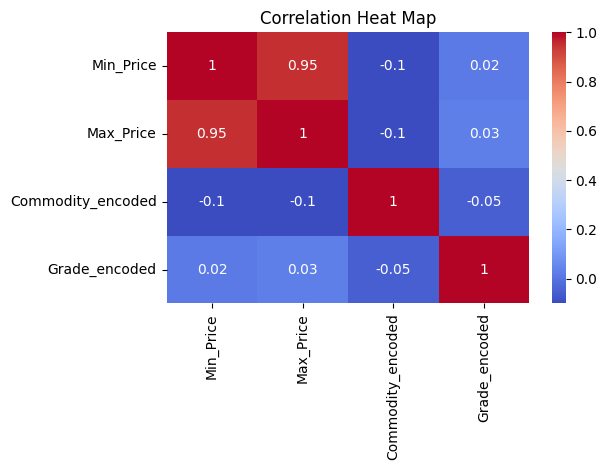

,Min_Price,Max_Price,Modal_Price,Commodity_encoded,Grade_encoded
0,4100.0,4500.0,4350.0,22,0
1,2200.0,3000.0,2450.0,28,0
2,2350.0,3000.0,2700.0,32,0
3,7000.0,7500.0,7250.0,40,0
4,8400.0,9000.0,8850.0,60,0


In [ ]:
# Creating a correlation heat map to avoid multicollinearlity
sns.heatmap(data.drop(columns=["Modal_Price"]).corr().round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.tight_layout()
plt.show()
data.head()

# Part_6: Splitting data & Training
Splitting data we have in this we way; 20% goes to test our model, and 80% goes in training our Prediction Model

In [ ]:
# Splitting the data into features and target
X = data.drop('Modal_Price', axis=1)
y = data['Modal_Price']

In [ ]:
# Splitting the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Min_Price,Max_Price,Commodity_encoded,Grade_encoded
4015,1121.0,1300.0,175,0
4453,2100.0,2300.0,28,0
20505,10200.0,10300.0,8,2
19570,500.0,1300.0,175,0
13822,1800.0,2200.0,58,0


## Part_6.1: Building our model & fitting data into it.
building our 3 model by using ```scikit-learn``` python library, later we will chose best performer that will be our best one:
- Linear regression model
- Decision tree model
- Random forest model

In [ ]:
# Building the models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)

In [ ]:
# fitting the models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Part_6.2: Performance of Model
Measuring peroformance of model base on the Root Mean Squeared Error (RMSE).


In [ ]:
# calculating the rsmes
linear_rmse = root_mean_squared_error(y_test, linear_model.predict(X_test))
tree_rmse = root_mean_squared_error(y_test, tree_model.predict(X_test))
forest_rmse = root_mean_squared_error(y_test, forest_model.predict(X_test))
print("Linear Regression RMSE:", round(linear_rmse, 2))
print("Decision Tree RMSE:", round(tree_rmse, 2))
print("Random Forest RMSE:", round(forest_rmse, 2))

Linear Regression RMSE: 476.87
Decision Tree RMSE: 593.4
Random Forest RMSE: 503.33


### Our best perform model turns out to be ```LinearRegression Model```

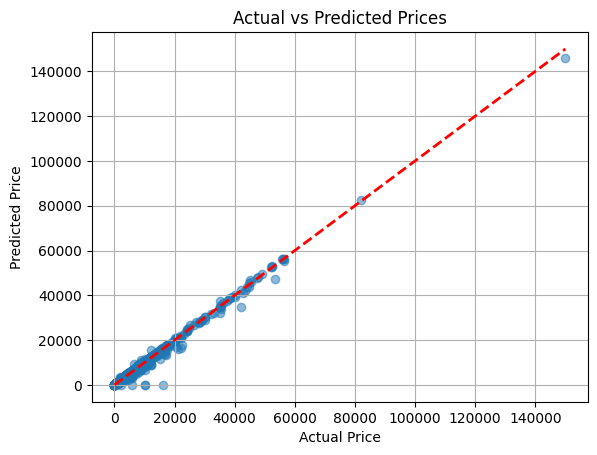

In [19]:
# Plotting the graph of the predicted vs the actual data
y_pred = linear_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

# Part_7: Saving model using pickle
Saving this will help to take user input that has been converter and make predictions as expected by the user.

In [20]:
# Saving the best performing model to be used in the API
pickle.dump(linear_model, open("linear_model.sav", "wb"))
# Loading the model
loaded_model = pickle.load(open("linear_model.sav", "rb"))

# ----------The end----------